![Deep Learning for Scientists in a hurry](./fig/Title.png)

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2022-08-19T21:57:57.325303-04:00

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 8.4.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 3.10.0-1160.24.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 52
Architecture: 64bit



In [3]:
import os
import time
start = time.time()
chapter_number = 4
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn
import pydot
import tensorflow as tf
from tensorflow import keras

2022-08-19 21:57:58.445483: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
%watermark -iv

sklearn   : 0.0
tensorflow: 2.9.1+nv22.07
keras     : 2.9.0
numpy     : 1.21.1
pandas    : 1.3.5
matplotlib: 3.5.0
pydot     : 1.4.2



In [6]:
os.environ["KERAS_HOME"] = "./data/keras"

## Keras datasets

In [7]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#data = keras.datasets.boston_housing.load_data()
#data = keras.datasets.cifar10.load_data()
#data = keras.datasets.cifar100.load_data()
#data = keras.datasets.fashion_mnist.load_data()
#data = keras.datasets.imdb.load_data()
#data = keras.datasets.mnist.load_data()
#data = keras.datasets.reuters.load_data()

In [8]:
import sklearn
from sklearn import datasets

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#data = datasets.fetch_20newsgroups(data_home='./data/scikit_learn_data', download_if_missing=False)
#data = datasets.fetch_20newsgroups_vectorized(data_home='./data/scikit_learn_data', download_if_missing=False)
#data = datasets.fetch_california_housing(data_home='./data/scikit_learn_data', download_if_missing=False)
#data = datasets.fetch_covtype(data_home='./data/scikit_learn_data', download_if_missing=False)
#data = datasets.fetch_kddcup99(data_home='./data/scikit_learn_data', download_if_missing=False)
#data = datasets.fetch_lfw_pairs(data_home='./data/scikit_learn_data', download_if_missing=False)
#data = datasets.fetch_lfw_people(data_home='./data/scikit_learn_data', download_if_missing=False)
#data = datasets.fetch_olivetti_faces(data_home='./data/scikit_learn_data', download_if_missing=False)
#data = datasets.fetch_rcv1(data_home='./data/scikit_learn_data', download_if_missing=False)
#data = datasets.fetch_species_distributions(data_home='./data/scikit_learn_data', download_if_missing=False)

# Image Classifier for the Fashion MNIST

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset of Zalando's article images—consisting of a training set of $60,000$ examples and a test set of $10,000$ examples. Each example is a $28 \times 28$ grayscale image, associated with a label from 10 classes. 

Fashion-MNIST serves as a direct drop-in replacement for the original MNIST dataset for learning and benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The authors of this dataset offer a few arguments to use Fashion-MNIST as a good replacement for MNIST:

  * **MNIST is too easy**. Convolutional nets can achieve 99.7% on MNIST. Classic machine learning algorithms can also achieve 97% easily. Check out our side-by-side benchmark for Fashion-MNIST vs. MNIST, and read "Most pairs of MNIST digits can be distinguished pretty well by just one pixel."

  * **MNIST is overused**. In this April 2017 Twitter thread, Google Brain research scientist and deep learning expert Ian Goodfellow calls for people to move away from MNIST.
  
  * **MNIST can not represent current challenges**, as noted in this April 2017 Twitter thread, deep learning expert/Keras author François Chollet.

Fashion MNIST is a bit more complex than MNIST but still simple enough for executing this notebook CPU only

The original [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset can be downloaded from the Github repo, but many frameworks include it and Keras is no exception.  

Keras has several functions to load popular datasets in `keras.datasets`. The fashion-MNIST dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set.

One of the advantages of these **prêt-à-porter** datasets is that they are perfectly balanced. There is an equal number of cases for each class and the training and test datasets are already scrambled. These situations are not found so often in real cases.

## Loading the dataset

In [9]:
import gzip

def load_data():
    dirname = './data/keras/datasets/fashion-mnist'
    files = [
        "train-labels-idx1-ubyte.gz",
        "train-images-idx3-ubyte.gz",
        "t10k-labels-idx1-ubyte.gz",
        "t10k-images-idx3-ubyte.gz",
    ]

    paths = []
    for fname in files:
        paths.append(dirname + os.sep + fname)

    with gzip.open(paths[0], "rb") as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], "rb") as imgpath:
        x_train = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(
            len(y_train), 28, 28
        )

    with gzip.open(paths[2], "rb") as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], "rb") as imgpath:
        x_test = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(
            len(y_test), 28, 28
        )

    return (x_train, y_train), (x_test, y_test)

In [10]:
#fashion_mnist = keras.datasets.fashion_mnist
#(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels.
We can check that by inspecting the shape of the four tensors:

In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

Each pixel intensity is represented as an unsigned integer using 1 byte (uint8) which means that values run from 0 to 255.

In [13]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. 
The training is the collection of cases that we use to adjust the weights while the validation set is used to fine-tune other parameters of our network.

We also scale the pixel intensities down to the 0-1 range and convert them to  truncated Real numbers with dtype `float64`.

In [14]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [15]:
X_train.shape

(55000, 28, 28)

In [16]:
X_train.dtype

dtype('float64')

## Plotting some of the cases

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map and no interpolation:

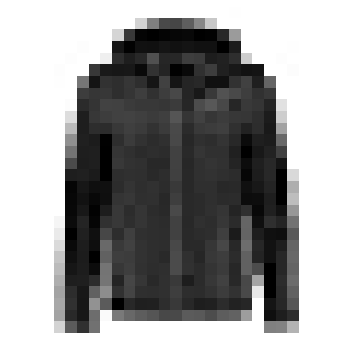

In [17]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[0], cmap="binary", interpolation='none')
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [18]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

The 10 values correspond to a text string that identify the kind of image it represents.

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a `coat`:

In [20]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [21]:
X_valid.shape

(5000, 28, 28)

In [22]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

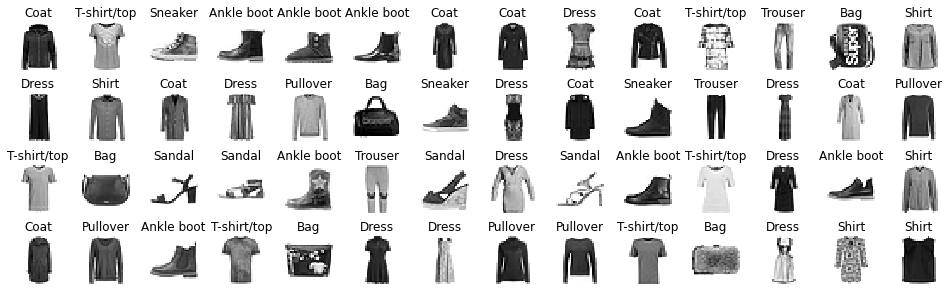

In [23]:
n_rows = 4
n_cols = 14
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

## Building a Dense Neural Network

We start with a simple architecture. Keras makes it very easy to create networks with minimal effort.

We will use a simple `Sequential` network, ie each layer propagates to the next one and you can describe it as a succession of layers that can be listed.

We define 4 layers, one `Flatten` input and 3 `Dense`. Let's build the model and continue explaining the parts.

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2022-08-19 21:58:02.394084: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-19 21:58:03.649195: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21326 MB memory:  -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:89:00.0, compute capability: 7.5
2022-08-19 21:58:03.650521: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 21326 MB memory:  -> device: 1, name: Quadro RTX 6000, pci bus id: 0000:8a:00.0, compute capability: 7.5
2022-08-19 21:58:03.651639: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/de

### `keras.layers.Flatten(input_shape=[28, 28])`

The Fashion-MNIST images are $28 \times 28$. This layer will reshape the tensors by flattening the ranks for height and width. This layer will expose the input as $784$ values that will be the input for the next layer.

### `keras.layers.Dense(300, activation="relu")`

This layer takes the $768$ inputs and connects them to $300$. That means that here we have a matrix of weights of $768 \times 300$ plus 300 biases.

The activation ReLU is a common activation function that will introduce the non-linear component to the network, it will zero negative values and keep the positive ones.

### `keras.layers.Dense(100, activation="relu")`

On this layer, we receive 300 inputs from the previous layer and we will fully connect those inputs to 100 neurons.
The weight matrix will be $300 \times 100$ plus $100$ biases

### `keras.layers.Dense(10, activation="softmax")`

This is our last layer and the output should match the number of classes for our classifier. We take 100 inputs and return 10 outputs. As we are doing classification softmax will return to us positive values that are added will be equal to 1. We interpret those values as the probabilities of the original image being of each class. This probability is completely arbitrary and a result of the use of `softmax`

Keras offers a summary for our network, informing layer by layer the number of parameters that we need to optimize.
See the column `Param #` and confirm by yourself that the number of parameters (weights + biases) corresponds to what you expect of each layer. 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Keras manages a global state, which it uses to implement the Functional model-building API and to uniquify autogenerated layer names.
In this case is not needed, but when many models are trained in loops it is a good idea to clear the session with 
`keras.backend.clear_session()`

We are forcing the random number generators for TensorFlow and NumPy to start on a very definite state for reproducibility of this notebook.

In [26]:
keras.backend.clear_session()
np.random.seed(314)
tf.random.set_seed(314)

There is an alternative way of creating sequential networks in Keras by using a constructor that takes a list of layers as input. The code below will create an identical network to our original version.

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [28]:
model.layers

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


This is another way of producing a graph of the Network.
It requires `pydot` to be installed.

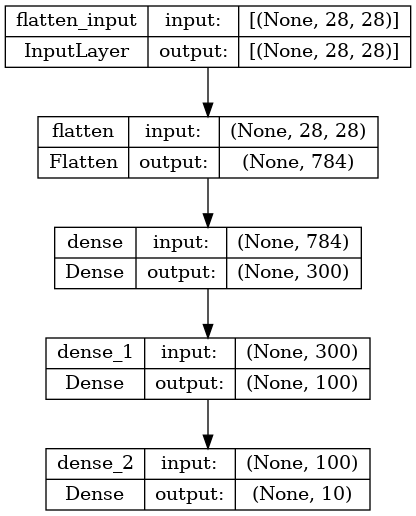

In [30]:
keras.utils.plot_model(model, to_file="./output/fmnist_model.png", show_shapes=True)

We can inspect layer by layer and extract the weights and biases.

In [31]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [32]:
model.get_layer(hidden1.name) is hidden1

True

In [33]:
weights, biases = hidden1.get_weights()

The network is untrained so the values that we can see here are just random values.

In [34]:
weights

array([[-0.00445096, -0.05802905, -0.00272267, ...,  0.01093186,
         0.03734258,  0.07245672],
       [ 0.06356795,  0.01053756,  0.02784353, ..., -0.05280763,
         0.05501817,  0.03636063],
       [-0.00783898,  0.03105386,  0.03145674, ...,  0.01533161,
         0.01561041, -0.03899335],
       ...,
       [ 0.05224155,  0.0106439 , -0.00434171, ..., -0.02974773,
         0.04581469,  0.02314712],
       [-0.03622095, -0.00143568,  0.06258012, ..., -0.06878318,
        -0.0185273 , -0.0247665 ],
       [-0.02326169,  0.05251291, -0.02943061, ..., -0.02974505,
         0.0412818 ,  0.04627647]], dtype=float32)

In [35]:
weights.shape

(784, 300)

In [36]:
np.max(biases)

0.0

In [37]:
biases.shape

(300,)

## Compiling the model

In Keras, a model needs to be compiled, arguments for the compilation include declaring the loss function, the optimizer, and the metrics.

Let's execute the compilation line and understand the 3 arguments used there.

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

In [39]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

```

### Loss Function

The lost function selected here is `sparse_categorical_crossentropy`.

The Cross-Entropy Loss Function is defined as:

$$L_{CE} = - \sum_{i=1}^n t_i \log(p_i)$$

For n categories where the ground true values are $t_i$ and the outputs of the *Softmax* function are $p_i$.

As *Softmax* is a continuously differentiable function. This makes it possible to calculate the derivative of the loss function with respect to every weight in the neural network. This property allows the model to adjust the weights accordingly to minimize the loss function (model output close to the true values).

There are two related functions for Cross Entropy.
**Categorical Cross-Entropy** and **Sparse Categorical Cross-Entropy**.

Both **categorical cross entropy** and **sparse categorical cross-entropy** have the same loss function as defined in Equation above. The only difference between the two is how truth labels are defined.

**Categorical cross-entropy** is used when true labels are one-hot encoded, for example, we have the following true values for 3-class classification problem [1,0,0], [0,1,0] and [0,0,1].

**sparse categorical cross-entropy** is used when truth labels are integer encoded, for example, [1], [2] and [3] for 3-class problem.

See the [Keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses) for all the losses available in Keras.

### Optimizer

The optimizer selected is called `keras.optimizers.SGD()`

This is an optimizer called Stochastic Gradient descent (SGD) (with potential momentum).
The default arguments are:

```python
tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    name='SGD',
    **kwargs
)
```

Gradient Descent is an iterative algorithm, that starts from some point on a function and travels down its slope in small steps until it reaches the lowest point of that function.

Gradient Descent will update parameter $w_i$ with gradient $g_i$ when momentum is 0:

$$w = w - \text{learning_rate} * g$$

### Metrics

Metrics are a list of functions to be evaluated by the model during training and testing. They can be a string such as `accuracy` or an explicit function or a `tf.keras.metrics.Metric` instance. Typically you will use 
`metrics=['accuracy']`

Here we are using the explicit value `keras.metrics.sparse_categorical_accuracy` which is appropriate for classification problems. 

We are using the `sparse` version because our labels are numbers such as $3$ instead of full arrays such as $[0,0,0,1,0,0,0,0,0,0]$.

## Training the model

This is the computationally demanding portion of using Deep Learning models. In this case, we will run 30 runs where all the values in the training dataset will pass through the network and the weights and biases will be adjusted using the gradients of the activation functions to induce a lowering of the loss.

After each **epoch** the validation dataset ($5000$ elements in our case) are used to determine how much the model performs with elements that have not been used for training.

In [40]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7010 - sparse_categorical_accuracy: 0.7682 - val_loss: 0.5841 - val_sparse_categorical_accuracy: 0.7922
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4864 - sparse_categorical_accuracy: 0.8308 - val_loss: 0.4545 - val_sparse_categorical_accuracy: 0.8484
Epoch 3/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4414 - sparse_categorical_accuracy: 0.8457 - val_loss: 0.4229 - val_sparse_categorical_accuracy: 0.8560
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4150 - sparse_categorical_accuracy: 0.8549 - val_loss: 0.3859 - val_sparse_categorical_accuracy: 0.8708
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3935 - sparse_categorical_accuracy: 0.8622 - val_loss: 0.3862 - val_sparse_categorical_accuracy: 0.8692
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3789 - spars

Pay attention to the last values of `sparse_categorical_accuracy` vs `val_sparse_categorical_accuracy`. The difference is a reflection of the model *remembering* the values that were used for training rather than *learning* the transformations to be able to generalize for unseen data.

Lets explore the results stored in history that will help us put this in perspective

In [41]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [42]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [43]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

For plotting, we will use Pandas which can help us with a data frame to have a clean naming for columns.

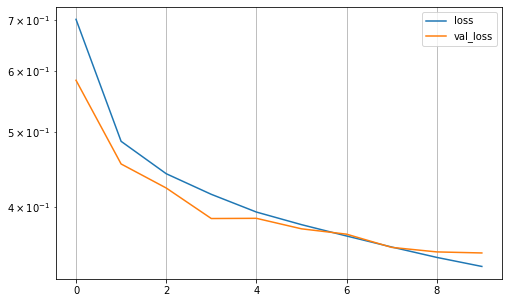

In [44]:
df = pd.DataFrame(history.history)

df.plot(y=['loss', 'val_loss' ], logy=True, figsize=(8, 5))
plt.grid(True);

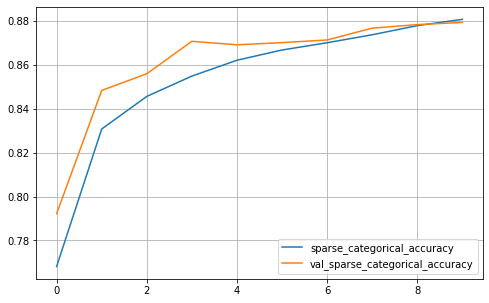

In [45]:
df.plot(y=['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy' ], figsize=(8, 5))
plt.grid(True);

It is clear from the plots above that beyond epoch 10 our model is not learning but remembering. In Machine Learning terminology that is called **overfitting**.

## Evaluating the model with the test data

We can confirm the overfitting when running the model over the test dataset. The accuracy we are getting has not improved since epoch 10

In [46]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3893 - sparse_categorical_accuracy: 0.8625


[0.3892698585987091, 0.862500011920929]

Lets take the first 3 elements from our test set and inspect them closely:

In [47]:
n_cases = 12
X_new = X_test[:n_cases]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[1.00708981e-04, 1.51915276e-06, 5.17057015e-05, 1.14062532e-04,
        5.96612472e-06, 6.69393092e-02, 1.67346996e-04, 5.08389547e-02,
        2.92844768e-03, 8.78852010e-01],
       [1.17299307e-04, 1.59689364e-07, 9.56585169e-01, 2.03282821e-06,
        8.14769603e-03, 6.10184703e-09, 3.51451375e-02, 1.29149924e-09,
        2.52940595e-06, 2.73198753e-09],
       [2.53378039e-05, 9.99952078e-01, 1.09342398e-06, 8.83668417e-06,
        1.20333380e-05, 1.72946535e-09, 3.07605717e-07, 3.80348375e-09,
        2.08659742e-07, 2.12834217e-09],
       [3.12940319e-05, 9.99805033e-01, 5.15540887e-06, 1.40635719e-04,
        1.64592475e-05, 1.05774248e-07, 9.66645075e-07, 4.46213662e-08,
        2.15788916e-07, 1.38687739e-07],
       [6.35032728e-02, 5.26145086e-05, 4.19465601e-02, 1.27297081e-03,
        8.67157336e-03, 3.55784073e-06, 8.84211540e-01, 1.30549552e-06,
        3.21615749e-04, 1.49495263e-05],
       [1.40243233e-03, 9.97442126e-01, 5.32215163e-05, 1.81115698e-04,
   

The values above are the probability distribution for the 3 first elements in the test set.
To make this numbers easier to see we can round them to 2 decimals.
It is important to notice the difference between the highest probability and the second one.

In [48]:
y_pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.05, 0.  , 0.88],
       [0.  , 0.  , 0.96, 0.  , 0.01, 0.  , 0.04, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.06, 0.  , 0.04, 0.  , 0.01, 0.  , 0.88, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.92, 0.  , 0.06, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97, 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.01, 0.  , 0.  , 0.92, 0.01, 0.05, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  ],
       [0.  , 0.  , 0.14, 0.  , 0.77, 0.  , 0.08, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Or simply take the highest values to get the predicted classes

In [49]:
y_new = np.argmax(y_pred, axis=1).astype(np.uint8)
y_new

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5], dtype=uint8)

In [50]:
fmnist_classes = np.array(class_names)
fmnist_classes

array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], dtype='<U11')

In [51]:
fmnist_classes[y_new]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal'],
      dtype='<U11')

Let's compare them with the true labels associated with them

In [52]:
y_tnew = y_test[:n_cases]
y_tnew

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5], dtype=uint8)

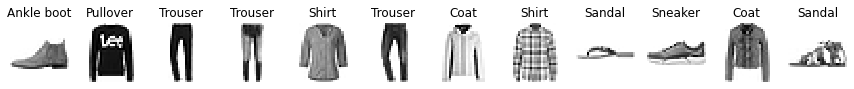

In [53]:
plt.figure(figsize=(15, 3))
for index, image in enumerate(X_new):
    plt.subplot(1, 12, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [54]:
np.equal(y_new,y_tnew)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [55]:
np.all(np.equal(y_new,y_tnew))

True

# Regression MLP

Let's load, split and scale the California housing dataset:

In [56]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing(data_home='./data/scikit_learn_data', download_if_missing=False)

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [57]:
X_train.shape

(11610, 8)

In [58]:
X_train.shape[1:]

(8,)

In [59]:
np.random.seed(31415)
tf.random.set_seed(31415)

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-4))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 4.8316 - val_loss: 5.2814
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 3.2835 - val_loss: 6.0660
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 2.3620 - val_loss: 6.6871
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 1.7999 - val_loss: 6.5407
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 1.4485 - val_loss: 5.7228
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 1.2207 - val_loss: 4.8619
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 1.0711 - val_loss: 3.8461
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.9691 - val_loss: 2.9983
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8976 - val_loss: 2.3147
Epoch 10/10
1/1 [==============================] - 0s 34ms/step


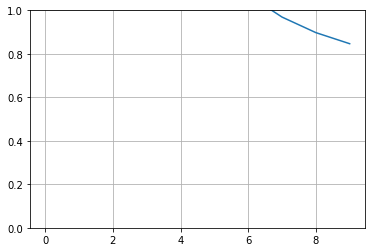

In [61]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [62]:
y_pred

array([[0.77902615],
       [0.8439153 ],
       [1.4832237 ]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [63]:
np.random.seed(314)
tf.random.set_seed(314)

In [64]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [65]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

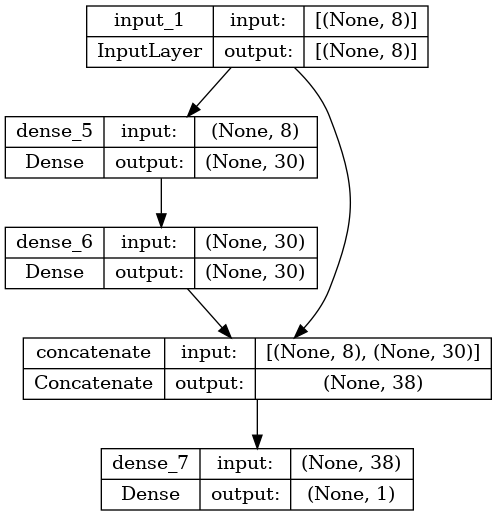

In [66]:
keras.utils.plot_model(model, to_file="./output/fmnist_model.png", show_shapes=True)

In [67]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.7746 - val_loss: 1.1621
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7174 - val_loss: 0.8346
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6435 - val_loss: 0.6048
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6092 - val_loss: 0.6388
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5803 - val_loss: 0.5631
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5586 - val_loss: 0.5939
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5390 - val_loss: 0.5548
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5219 - val_loss: 0.5063
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5085 - val_loss: 0.4745
Epoch 10/10
1/1 [==============================] - 0s 39ms/step


What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3, and 4).

In [68]:
np.random.seed(314)
tf.random.set_seed(314)

In [69]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [70]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                            

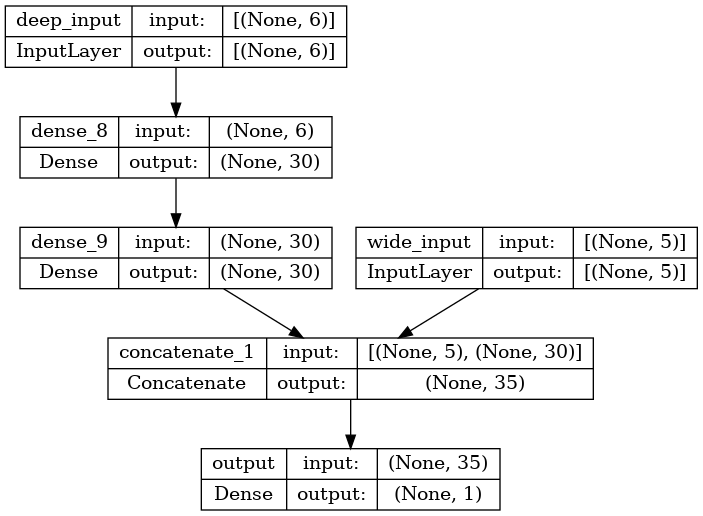

In [71]:
keras.utils.plot_model(model, to_file="./output/fmnist_model.png", show_shapes=True)

In [72]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=10,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.9144 - val_loss: 2.1957
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8192 - val_loss: 0.9632
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6692 - val_loss: 0.7157
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6064 - val_loss: 0.6056
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5682 - val_loss: 0.5504
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5415 - val_loss: 0.5161
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5201 - val_loss: 0.4913
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5031 - val_loss: 0.4778
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4912 - val_loss: 0.4650
Epoch 10/10
1/1 [==============================] - 0s 40ms/step


Adding an auxiliary output for regularization:

In [73]:
np.random.seed(314)
tf.random.set_seed(314)

In [74]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [75]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 30)           930         ['dense_10[0][0]']               
                                                                                            

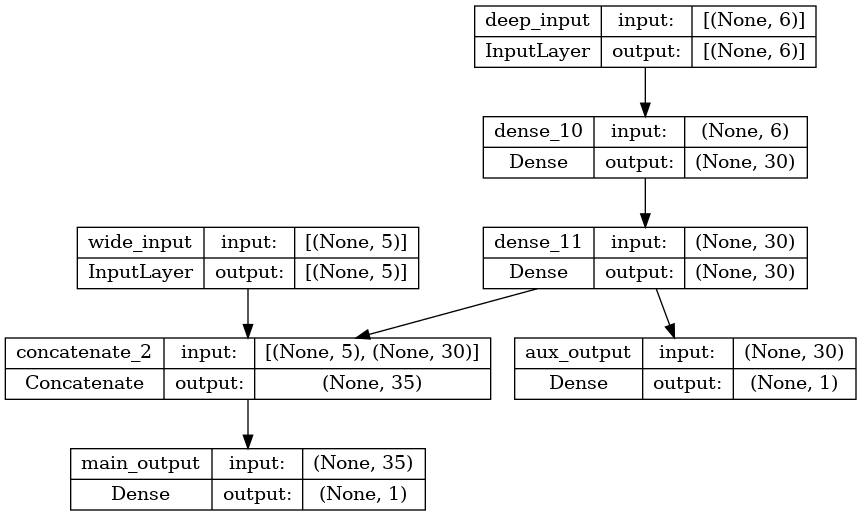

In [76]:
keras.utils.plot_model(model, to_file="./output/fmnist_model.png", show_shapes=True)

In [77]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [78]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.1221 - main_output_loss: 1.9922 - aux_output_loss: 3.2914 - val_loss: 3.9296 - val_main_output_loss: 3.0189 - val_aux_output_loss: 12.1256
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9992 - main_output_loss: 0.8586 - aux_output_loss: 2.2651 - val_loss: 2.1494 - val_main_output_loss: 1.1148 - val_aux_output_loss: 11.4604
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8090 - main_output_loss: 0.6897 - aux_output_loss: 1.8822 - val_loss: 1.7511 - val_main_output_loss: 0.7782 - val_aux_output_loss: 10.5068
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7300 - main_output_loss: 0.6207 - aux_output_loss: 1.7134 - val_loss: 1.4924 - val_main_output_loss: 0.6342 - val_aux_output_loss: 9.2163
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6831 - main_output_loss: 0.5797 - aux_output_loss: 1.6134 - val_l

In [79]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 45ms/step


# The subclassing API

In [80]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [81]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.5951 - output_1_loss: 2.3403 - output_2_loss: 4.8881 - val_loss: 3.2989 - val_output_1_loss: 3.2559 - val_output_2_loss: 3.6857
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0772 - output_1_loss: 0.8577 - output_2_loss: 3.0534 - val_loss: 1.0352 - val_output_1_loss: 0.8735 - val_output_2_loss: 2.4906
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8277 - output_1_loss: 0.6910 - output_2_loss: 2.0586 - val_loss: 0.7778 - val_output_1_loss: 0.6512 - val_output_2_loss: 1.9179
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7161 - output_1_loss: 0.6185 - output_2_loss: 1.5950 - val_loss: 0.6810 - val_output_1_loss: 0.5737 - val_output_2_loss: 1.6465
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6560 - output_1_loss: 0.5753 - output_2_loss: 1.3829 - val_loss: 0.6295 - val_output_1_loss: 0.5328 - val_ou

In [82]:
model = WideAndDeepModel(30, activation="relu")

# Saving and Restoring

In [83]:
np.random.seed(314)
tf.random.set_seed(314)

In [84]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [85]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8375 - val_loss: 2.0469
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.8802 - val_loss: 0.7973
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7216 - val_loss: 0.6656
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6623 - val_loss: 0.6274
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6198 - val_loss: 0.5816
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5852 - val_loss: 0.5487
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5550 - val_loss: 0.5242
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5289 - val_loss: 0.5027
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5070 - val_loss: 0.4705
Epoch 10/10
162/162 [==============================] - 0s 880us/step - loss: 0.4714


In [86]:
model.save("./output/my_keras_model.h5")

In [87]:
model = keras.models.load_model("./output/my_keras_model.h5")

In [88]:
model.predict(X_new)

1/1 [==============================] - 0s 38ms/step


array([[0.6842911],
       [1.2381904],
       [3.210239 ]], dtype=float32)

In [89]:
model.save_weights("./output/my_keras_weights.ckpt")

In [90]:
model.load_weights("./output/my_keras_weights.ckpt")

# Using Callbacks during Training

In [91]:
keras.backend.clear_session()
np.random.seed(314)
tf.random.set_seed(314)

In [92]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("./output/my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("./output/my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8375 - val_loss: 2.0469
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8802 - val_loss: 0.7973
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7216 - val_loss: 0.6656
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6623 - val_loss: 0.6274
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6198 - val_loss: 0.5816
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5852 - val_loss: 0.5487
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5550 - val_loss: 0.5242
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5289 - val_loss: 0.5027
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5070 - val_loss: 0.4705
Epoch 10/10
162/162 [==============================] - 0s 798us/step - loss: 0.4855


In [94]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4892 - val_loss: 0.4576
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4732 - val_loss: 0.4904
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4611 - val_loss: 0.4451
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4502 - val_loss: 0.4495
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4415 - val_loss: 0.4538
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4347 - val_loss: 0.4196
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4286 - val_loss: 0.4093
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4228 - val_loss: 0.4762
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4194 - val_loss: 0.4107
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4153 - val_lo

In [95]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [96]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

329/363 [==========================>...] - ETA: 0s - loss: 0.3762
val/train: 1.07
363/363 [==============================] - 1s 1ms/step - loss: 0.3767 - val_loss: 0.4049


# Cleaning

In [97]:
for i in ["my_keras_weights.ckpt.data-00000-of-00001",
          "my_keras_weights.ckpt.index", 
          "my_keras_weights.ckpt",
          "my_keras_model.h5",
          "fmnist_model.png", 
          "checkpoint" ]:
    if os.path.isfile(os.path.join('output',i)):
        os.remove(os.path.join('output',i))

---

# References

There are many books about Deep Learning and many more on Machine Learning. 
This list is by no means an exhaustive list of books. I am listing the books from which I took inspiration. Also, I am listing materials where I found better ways to present topics. Often I am amazed by how people can create approachable materials for seemingly dry subjects.

The order of the books goes from divulgation and practical to the more rigorous and mathematical. Slides, blogs, and videos are those I have found over the internet or suggested by others.

### Selection of Books on Deep Learning

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Kelleher" 
       src="./fig/books/Deep Learning - Kelleher.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      John D. Kelleher<br>
      2019<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Charniak" 
       src="./fig/books/Introduction to Deep Learning - Charniak.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Eugene Charniak<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Skansi" 
       src="./fig/books/Introduction to Deep Learning - Skansi.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Sandro Skansi<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Subramanian" 
       src="./fig/books/Deep Learning with PyTorch - Subramanian.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Vishnu Subramanian<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Stevens" 
       src="./fig/books/Deep Learning with PyTorch - Stevens.png" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Eli Stevens, Luca Artiga and Thomas Viehmann<br>
      2020<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with Python - Chollet" 
       src="./fig/books/Deep Learning with Python - Chollet.jpg" 
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with Python (Second Edition)<br>
      François Chollet<br>
      2021<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Patterson" 
       src="./fig/books/Deep Learning - Patterson.jpeg"
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning, a practitioner's approach<br>
      Josh Patterson and Adam Gibson<br>
      2017<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Goodfellow" 
       src="./fig/books/Deep Learning - Goodfellow.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      Ian Goodfellow, Yoshua Bengio, and Aaron Courville<br>
      2016<br>
  </div>
</div>

### Interactive Books

  * [Dive into Deep Learning](https://d2l.ai/index.html)<br>
    Interactive deep learning book with code, math, and discussions<br> 
    Implemented with PyTorch, NumPy/MXNet, and TensorFlow<br>
    Adopted at 300 universities from 55 countries


### Slides

  * John Urbanic's ["Deep Learning in one Afternoon"](https://www.psc.edu/wp-content/uploads/2022/04/Deep-Learning.pdf)<br>
An excellent fast, condensed introduction to Deep Learning.<br>
John is a Parallel Computing Scientist at Pittsburgh Supercomputing Center

  * [Christopher Olah's Blog](http://colah.github.io) is very good. For example about [Back Propagation](http://colah.github.io/posts/2015-08-Backprop)

  * Adam W. Harley on his CMU page offers [An Interactive Node-Link Visualization of Convolutional Neural Networks](https://www.cs.cmu.edu/~aharley/vis/)



### Jupyter Notebooks

 * [Yale Digital Humanities Lab](https://github.com/YaleDHLab/lab-workshops)
 
 * Aurelien Geron Hands-on Machine Learning with Scikit-learn 
   [First Edition](https://github.com/ageron/handson-ml) and
   [Second Edition](https://github.com/ageron/handson-ml2)
   
 * [A progressive collection notebooks of the Machine Learning course by the University of Turin](https://github.com/rugantio/MachineLearningCourse)
   
 * [A curated set of jupyter notebooks about many topics](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
   
### Videos

 * [Caltech's "Learning from Data" by Professor Yaser Abu-Mostafa](https://work.caltech.edu/telecourse.html)
 
 * [3Blue1Brown Youtube Channel](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
 
 ---

# Back of the Book

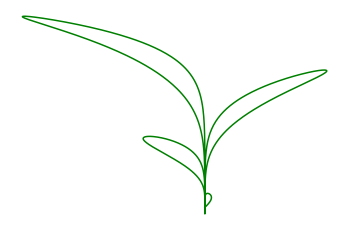

In [98]:
n = chapter_number
t = np.linspace(0, (2*(n-1)+1)*np.pi/2, 1000)
x = t*np.cos(t)**3
y = 9*t*np.sqrt(np.abs(np.cos(t))) + t*np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [99]:
end = time.time()
print(f'Chapter {chapter_number} took {int(end - start):d} seconds')

Chapter 4 took 99 seconds
